## <font size=5> <strong>Heart Disease Prediction 
 

## I. Importing essential libraries

In [2]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
#print("hi",os.listdir())

import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/91/1d/0484130df7e33e044da88a091827d6441b77f907075bf7bbe145857d6590/scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("expanded_data.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(4000, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,3,130,388,0,1,126,1,4.2,0,2,1,0
1,57,0,1,95,372,1,1,140,0,2.5,0,0,0,3
2,43,1,1,114,368,0,1,179,0,3.0,0,1,0,5
3,71,0,0,102,275,1,0,133,0,0.0,1,3,2,0
4,36,1,2,97,288,0,0,131,0,4.2,1,2,0,2


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2479,50,0,1,112,320,0,0,125,0,0.4,1,2,0,4
60,68,1,0,152,167,0,2,132,1,0.2,2,3,1,2
1118,33,1,3,108,202,0,0,189,1,5.8,2,0,1,2
1423,42,1,0,176,352,0,0,147,1,1.8,1,0,1,4
1146,71,1,0,113,213,0,1,195,0,4.5,0,3,0,2


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,52.885250,0.525500,1.507500,133.143000,275.317500,0.488750,0.991500,150.107250,0.537000,2.971150,1.007000,1.460500,1.025250,2.467000
std,13.926057,0.499412,1.111869,25.763753,71.066091,0.499936,0.825287,28.544421,0.498691,1.762067,0.809701,1.131044,0.793895,1.762864
min,29.000000,0.000000,0.000000,90.000000,150.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,110.000000,216.000000,0.000000,0.000000,125.000000,0.000000,1.400000,0.000000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,1.000000,133.000000,273.000000,0.000000,1.000000,150.000000,1.000000,2.900000,1.000000,1.000000,1.000000,2.000000
75%,64.000000,1.000000,3.000000,154.000000,334.000000,1.000000,2.000000,176.000000,1.000000,4.500000,2.000000,2.000000,2.000000,4.000000
max,76.000000,1.000000,3.000000,179.000000,399.000000,1.000000,2.000000,199.000000,1.000000,6.000000,2.000000,3.000000,2.000000,5.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4000 non-null   int64  
 1   sex       4000 non-null   int64  
 2   cp        4000 non-null   int64  
 3   trestbps  4000 non-null   int64  
 4   chol      4000 non-null   int64  
 5   fbs       4000 non-null   int64  
 6   restecg   4000 non-null   int64  
 7   thalach   4000 non-null   int64  
 8   exang     4000 non-null   int64  
 9   oldpeak   4000 non-null   float64
 10  slope     4000 non-null   int64  
 11  ca        4000 non-null   int64  
 12  thal      4000 non-null   int64  
 13  target    4000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 437.6 KB


In [9]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    4000.000000
mean        2.467000
std         1.762864
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([0, 3, 5, 2, 1, 4])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
cp          0.038145
age         0.037827
fbs         0.034620
thal        0.026474
thalach     0.025341
ca          0.020040
restecg     0.019959
trestbps    0.019811
sex         0.019702
exang       0.017100
oldpeak     0.014031
slope       0.006293
chol        0.004756
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
0    731
1    729
5    714
4    652
3    613
2    561
Name: count, dtype: int64


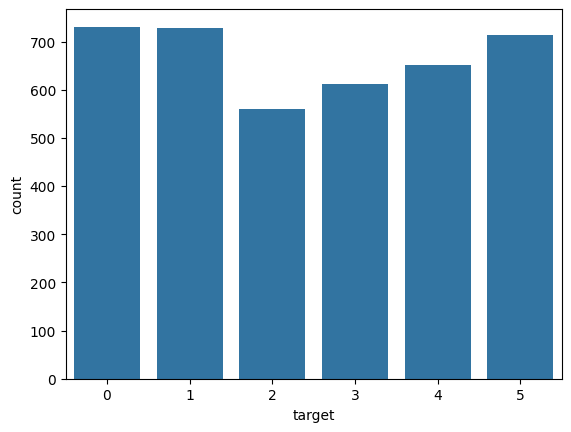

In [15]:


# Access the target variable
y = dataset["target"]

# Plot the countplot
sns.countplot(data=dataset, x="target")  # or y="target" depending on the orientation you want

# Display the count values
target_temp = y.value_counts()
print(target_temp)

# Show the plot
plt.show()


In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 241.25
Percentage of patience with heart problems: 240.59


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

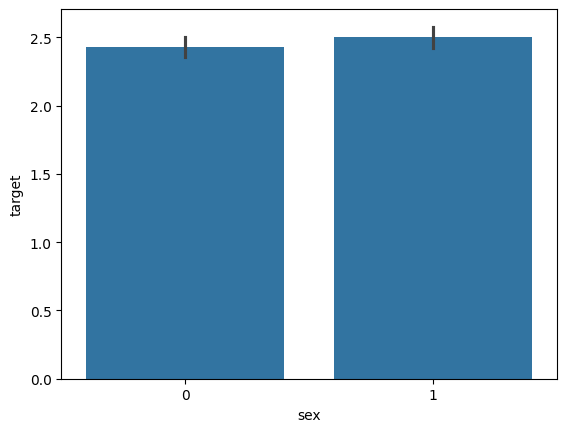

In [18]:
sns.barplot(x="sex", y=y, data=dataset)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([3, 1, 0, 2])

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

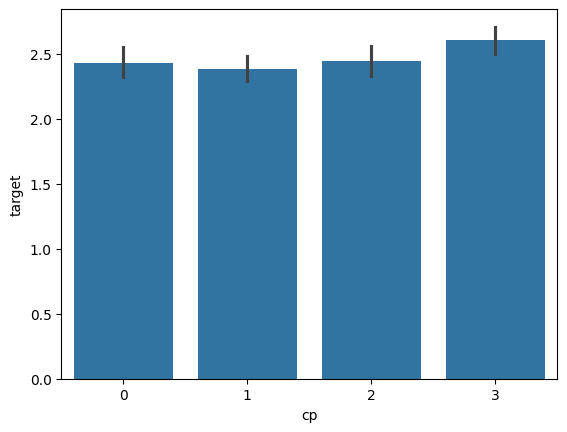

In [20]:

sns.barplot(x="cp", y=y, data=dataset)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    4000.000000
mean        0.488750
std         0.499936
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([0, 1])

<Axes: xlabel='fbs', ylabel='target'>

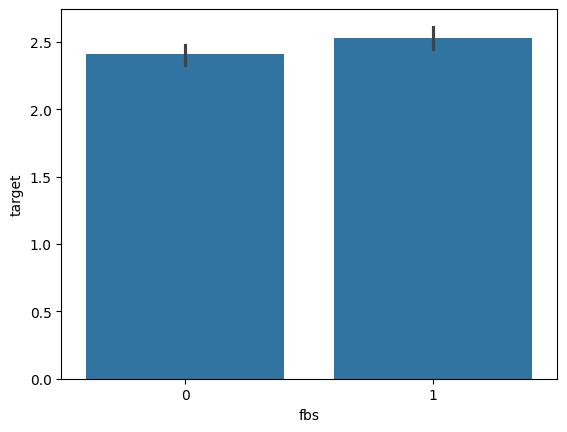

In [23]:
sns.barplot(x="fbs", y=y, data=dataset)

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([1, 0, 2])

<Axes: xlabel='restecg', ylabel='target'>

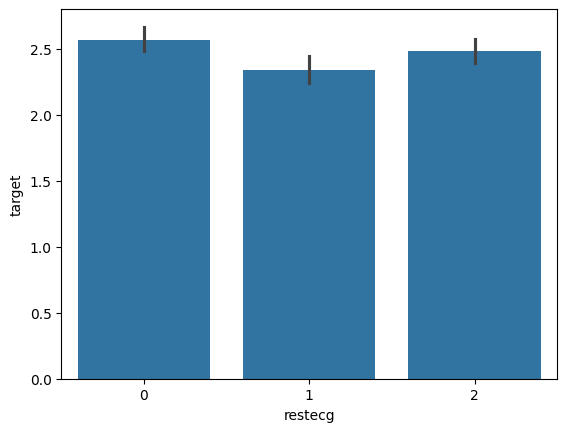

In [25]:
sns.barplot(x="restecg", y=y, data=dataset)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([1, 0])

<Axes: xlabel='exang', ylabel='target'>

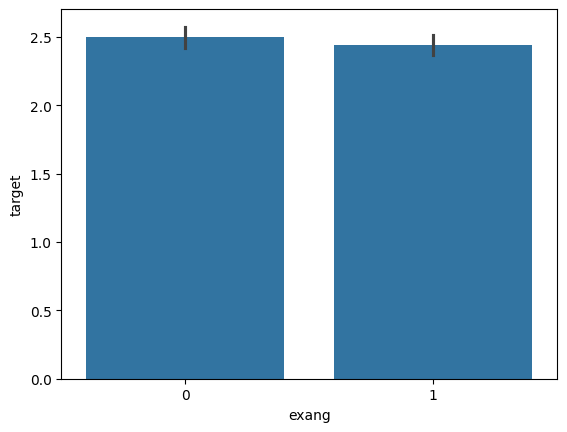

In [27]:
sns.barplot(x="exang", y=y, data=dataset)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([0, 1, 2])

<Axes: xlabel='slope', ylabel='target'>

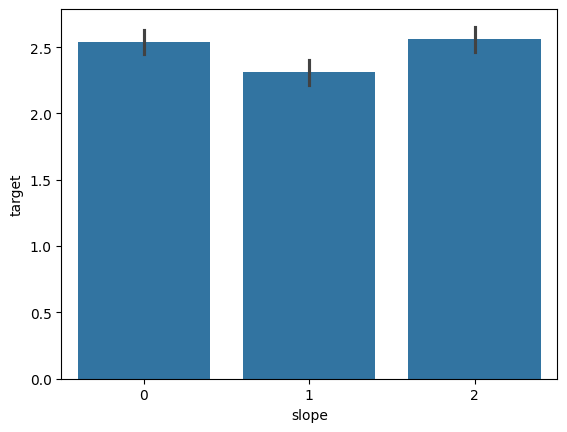

In [29]:
sns.barplot(x="slope", y=y, data=dataset)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["ca"].unique()

array([2, 0, 1, 3])

<Axes: xlabel='ca', ylabel='target'>

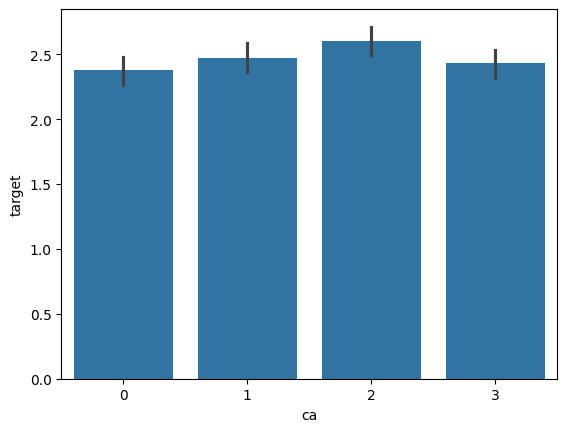

In [32]:
sns.barplot(x="ca", y=y, data=dataset)

##### ca=4 has astonishingly large number of heart patients

In [33]:
### Analysing the 'thal' feature

In [34]:
dataset["thal"].unique()

array([1, 0, 2])

<Axes: xlabel='thal', ylabel='target'>

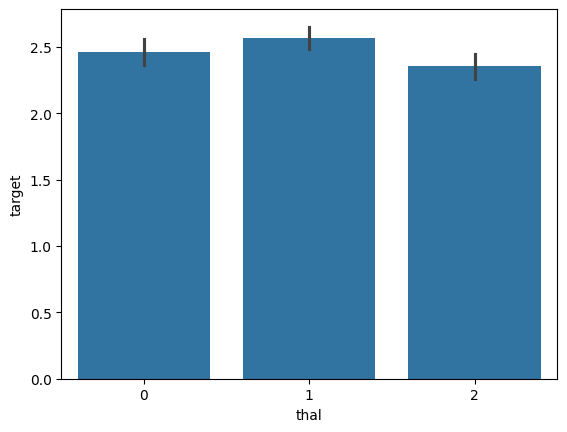

In [35]:
sns.barplot(x="thal", y=y, data=dataset)

## IV. Train Test split

In [36]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
X_train.shape

(3200, 13)

In [38]:
X_test.shape

(800, 13)

In [39]:
Y_train.shape

(3200,)

In [40]:
Y_test.shape

(800,)

## V. Model Fitting

In [41]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
Y_pred_lr[0]

np.int64(4)

In [43]:
Y_pred_lr.shape

(800,)

In [44]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 23.25 %


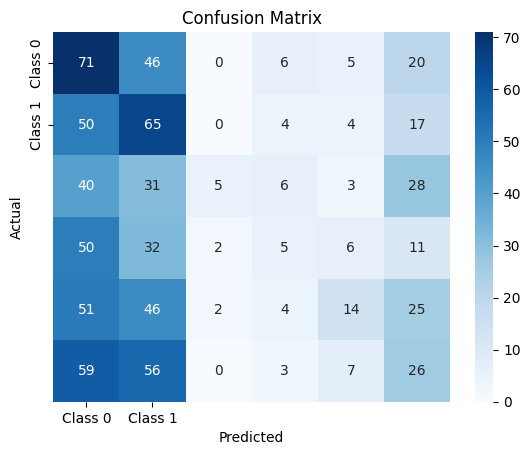

In [45]:

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred_lr)

# Display confusion matrix using heatmap
labels = ['Class 0', 'Class 1']  # Replace with your class labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [47]:
Y_pred_nb.shape

(800,)

In [48]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 25.75 %


### SVM

In [49]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [50]:
Y_pred_svm.shape

(800,)

In [51]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 23.0 %


### K Nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [53]:
Y_pred_knn.shape

(800,)

In [54]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 57.0 %


### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [56]:
print(Y_pred_dt.shape)

(800,)


In [57]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 96.62 %


### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

KeyboardInterrupt: 

In [ ]:
Y_pred_rf.shape

(800,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 98.5 %


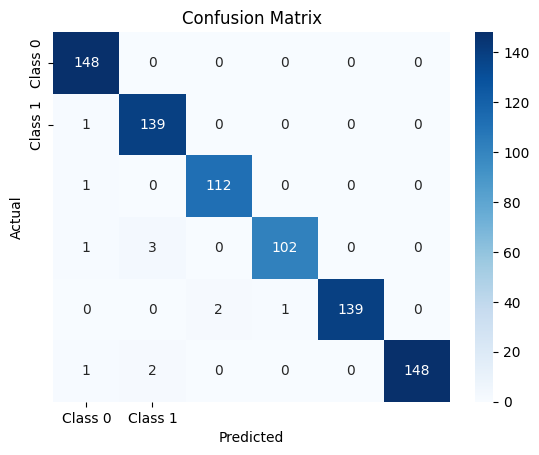

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred_rf)

# Display confusion matrix using heatmap
labels = ['Class 0', 'Class 1']  # Replace with your class labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### XGBoost

In [ ]:
%pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
Y_pred_xgb.shape

(800,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 95.75 %


## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 23.25 %
The accuracy score achieved using Naive Bayes is: 25.75 %
The accuracy score achieved using Support Vector Machine is: 23.0 %
The accuracy score achieved using K-Nearest Neighbors is: 57.0 %
The accuracy score achieved using Decision Tree is: 96.62 %
The accuracy score achieved using Random Forest is: 98.5 %
The accuracy score achieved using XGBoost is: 95.75 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

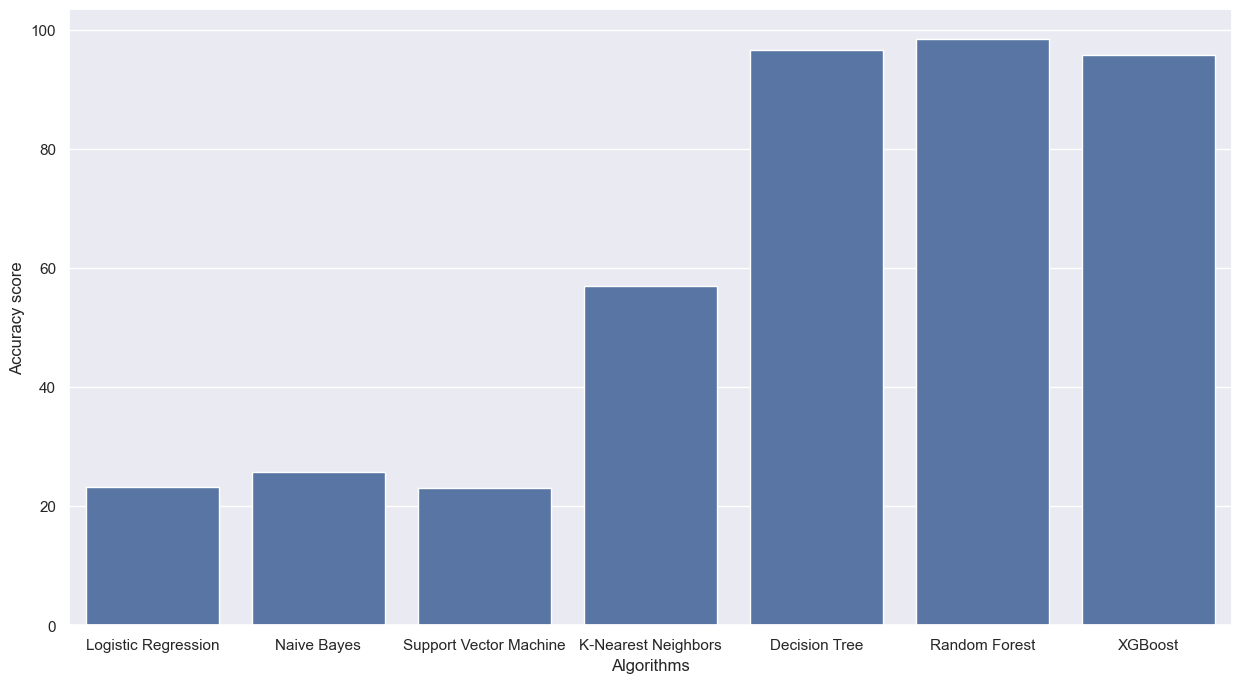

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)
print(X_test)

Y_pred_svm = sv.predict(X_test)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2230   43    1   1       114   368    0        1      179      0      3.0   
668    61    0   0        90   382    0        1      187      1      3.8   
3616   71    0   3       100   399    1        1      102      0      0.8   
2363   75    0   0       119   159    1        1      147      0      4.7   
142    37    1   3       176   203    1        0      119      0      2.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1118   33    1   3       108   202    0        0      189      1      5.8   
3572   51    1   3       129   217    1        1      122      1      2.8   
2482   73    1   3       147   318    0        2      150      1      3.4   
643    64    0   3       136   306    0        2      119      1      1.5   
299    74    1   3       172   373    1        0      159      0      0.8   

      slope  ca  thal  
2230      0   1     0  
668       1   3     2  
361

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>

In [80]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict([67,1,3	130	388	0	1	126	1	4.2	0	2	1	0
)


array([5, 1, 1, 3, 5, 1, 4, 0, 0, 0, 5, 2, 3, 0, 4, 4, 4, 0, 1, 0, 1, 1,
       4, 5, 4, 0, 3, 0, 0, 0, 2, 3, 1, 4, 4, 5, 4, 1, 5, 0, 0, 5, 2, 5,
       2, 0, 1, 5, 0, 2, 2, 0, 3, 3, 3, 0, 0, 4, 5, 4, 4, 5, 1, 2, 2, 0,
       5, 1, 5, 5, 1, 5, 2, 5, 2, 2, 0, 3, 5, 5, 4, 3, 5, 1, 1, 2, 4, 1,
       3, 1, 0, 1, 4, 2, 4, 0, 2, 2, 5, 5, 2, 2, 0, 0, 1, 4, 2, 0, 5, 1,
       5, 5, 1, 5, 0, 5, 2, 1, 3, 2, 4, 4, 5, 3, 5, 3, 4, 2, 5, 2, 4, 2,
       2, 0, 4, 5, 2, 3, 3, 2, 4, 1, 5, 0, 3, 4, 0, 0, 5, 4, 4, 1, 5, 3,
       1, 5, 0, 2, 4, 0, 0, 1, 5, 1, 5, 3, 4, 3, 3, 4, 4, 3, 3, 4, 1, 5,
       5, 0, 4, 1, 3, 4, 4, 1, 3, 0, 0, 4, 1, 0, 1, 2, 0, 0, 1, 1, 3, 2,
       2, 2, 3, 1, 3, 3, 4, 1, 3, 0, 4, 3, 4, 5, 1, 0, 0, 5, 5, 2, 4, 5,
       5, 5, 0, 2, 0, 2, 4, 4, 4, 4, 2, 5, 0, 0, 1, 5, 3, 4, 3, 1, 5, 0,
       1, 1, 3, 0, 5, 1, 0, 3, 5, 4, 3, 5, 4, 3, 3, 5, 3, 1, 2, 0, 3, 3,
       5, 3, 1, 5, 4, 4, 3, 2, 4, 2, 2, 2, 3, 3, 4, 2, 2, 2, 0, 3, 0, 1,
       4, 4, 2, 4, 5, 1, 0, 4, 0, 0, 5, 5, 0, 4, 2,